## Tutorial Setup

### Check your install

In [7]:
import numpy

In [8]:
import scipy

In [9]:
import matplotlib

In [10]:
import sklearn

In [11]:
import psutil

In [12]:
import pandas

In [13]:
import IPython.parallel

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


Finding the location of an installed package and its version:

In [14]:
numpy.__path__

['/usr/local/anaconda3/lib/python3.7/site-packages/numpy']

In [15]:
numpy.__version__

'1.16.2'

## A NumPy primer

### NumPy array dtypes and shapes

In [15]:
import numpy as np

In [16]:
a = np.array([1, 2, 3])

In [17]:
a

array([1, 2, 3])

In [18]:
b = np.array([[0, 2, 4], [1, 3, 5]])

In [19]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [20]:
b.shape

(2, 3)

In [21]:
b.dtype

dtype('int64')

In [22]:
a.shape

(3,)

In [23]:
a.dtype

dtype('int64')

In [24]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [25]:
np.ones(shape=(3, 4), dtype=np.int32)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

### Common array operations

In [26]:
c = b * 0.5

In [27]:
c

array([[0. , 1. , 2. ],
       [0.5, 1.5, 2.5]])

In [28]:
c.shape

(2, 3)

In [29]:
c.dtype

dtype('float64')

In [30]:
a

array([1, 2, 3])

In [31]:
d = a + c

In [32]:
d

array([[1. , 3. , 5. ],
       [1.5, 3.5, 5.5]])

In [33]:
d[0]

array([1., 3., 5.])

In [34]:
d[0, 0]

1.0

In [35]:
d[:, 0]

array([1. , 1.5])

In [36]:
d.sum()

19.5

In [37]:
d.mean()

3.25

In [38]:
d.sum(axis=0)

array([ 2.5,  6.5, 10.5])

In [39]:
d.mean(axis=1)

array([3. , 3.5])

### Reshaping and inplace update

In [40]:
e = np.arange(12)

In [41]:
e

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
f = e.reshape(3, 4)

In [43]:
f

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
e 
# pandas da bu kisim degismis olurdu. ama e ayni.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [46]:
e[5:] = 0

In [47]:
e

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0])

In [48]:
f

# e degisince (ana degisken), f o zaman yeniden degisiyor;

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

### Combining arrays

In [65]:
a


array([1, 2, 3])

In [67]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [68]:
b.T

array([[0, 1],
       [2, 3],
       [4, 5]])

In [51]:
d

array([[1. , 3. , 5. ],
       [1.5, 3.5, 5.5]])

In [60]:
print(np.concatenate([a, a, a]))

# works differently for arrays and matrix !

print(np.concatenate([b,b]))

[1 2 3 1 2 3 1 2 3]
[[0 2 4]
 [1 3 5]
 [0 2 4]
 [1 3 5]]


In [62]:
print(np.vstack([a, b, d]))

# works same!

print(np.vstack([a, a]))

[[1.  2.  3. ]
 [0.  2.  4. ]
 [1.  3.  5. ]
 [1.  3.  5. ]
 [1.5 3.5 5.5]]
[[1 2 3]
 [1 2 3]]


In [63]:
print(np.hstack([b, d]))

# works same!

print(np.hstack([a, a]))

[[0.  2.  4.  1.  3.  5. ]
 [1.  3.  5.  1.5 3.5 5.5]]
[1 2 3 1 2 3]


## A Matplotlib primer

In [70]:
%matplotlib inline

In [71]:
import matplotlib.pyplot as plt

In [76]:
x = np.linspace(0, 2, 10) # 2/10 = 0.2

x

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

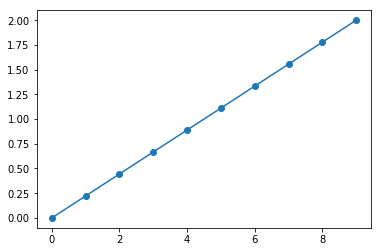

In [79]:
plt.plot(x, 'o-');

### vectorize f for numpy arrays

In [118]:
import math

k = lambda i: i ** 2
z = lambda i: math.exp(i)   # gives error size-1 array conversion... so vectorize it!

z_vectorized = np.vectorize(z)   # we should have used np.exp(x)..

z_vectorized(x)

array([1.        , 1.24884887, 1.5596235 , 1.94773404, 2.43242545,
       3.03773178, 3.79366789, 4.73771786, 5.91669359, 7.3890561 ])

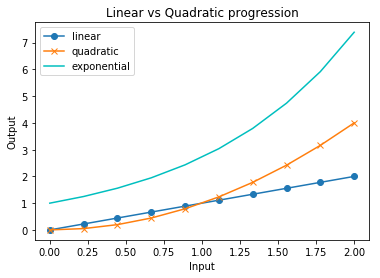

In [123]:
import math 

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')
plt.plot(x, z_vectorized(x), 'c-', label='exponential')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');

In [ ]:
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)

In [ ]:
samples.shape

In [ ]:
samples.dtype

In [ ]:
samples[:30]

In [ ]:
plt.hist(samples, bins=50);

In [ ]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000)
samples_2 = np.random.standard_t(df=10, size=10000)

In [ ]:
bins = np.linspace(-3, 3, 50)
_ = plt.hist(samples_1, bins=bins, alpha=0.5, label='samples 1')
_ = plt.hist(samples_2, bins=bins, alpha=0.5, label='samples 2')
plt.legend(loc='upper left');

In [ ]:
plt.scatter(samples_1, samples_2, alpha=0.1);